# Code slide Part -1

In [1]:
import numpy as np

NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation
  
For more information about introduction to NumPy. Read this [Doc](https://docs.scipy.org/doc/numpy-1.13.0/user/whatisnumpy.html)

In [2]:
numpy_array = np.array([1, 2, 3.0])

ndarray = block of memory + indexing scheme + data type descriptor

        raw data
        how to locate an element
        how to interpret an element

Ref: [Link](http://scipy-lectures.org/advanced/advanced_numpy/#id4)



In [3]:
numpy_array #Typecasted to float to maintain homogenity

array([1., 2., 3.])

In [4]:
numpy_array.dtype 

dtype('float64')

[List of Supported Data Types](https://docs.scipy.org/doc/numpy/user/basics.types.html)

In [5]:
type(numpy_array)

numpy.ndarray

In [6]:
type(numpy_array[0])

numpy.float64

In [7]:
numpy_array.append(9.0) # Should throw error

AttributeError: 'numpy.ndarray' object has no attribute 'append'

### NOTE

Numpy arrays are fixed size arrays unlike Python List/Dict ojects which are dynamic in nature.
Any insertion/deletion/concatination when/if performed creates a new copy of the array.
How this strict rule of homogenity and size helps Numpy? 
We will witness shortly.

# Code Slide Part-2

In [8]:
a = np.array([[1,2,3],[4,5,6]])

In [9]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [10]:
a.shape

(2, 3)

In [11]:
a.strides

(24, 8)

The strides of an array tell us how many bytes we have to skip in memory to move to the next position along a certain axis.
This StackOveflow Q/A explains it quite well. [Link](https://stackoverflow.com/questions/53097952/how-to-understand-numpy-strides-for-layman)

In [12]:
b = a.T # Transpose of a

In [13]:
b

array([[1, 4],
       [2, 5],
       [3, 6]])

In [14]:
b.shape

(3, 2)

In [15]:
b.strides

(8, 24)

In [16]:
c = a.reshape((6)) # Convert in 1-D array

In [17]:
c

array([1, 2, 3, 4, 5, 6])

In [18]:
c.shape

(6,)

In [19]:
c.strides

(8,)

In [20]:
a.__array_interface__['data'][0] # kinda databuff mem position

25869168

In [21]:
b.__array_interface__['data'][0] # kinda databuff mem position

25869168

In [22]:
c.__array_interface__['data'][0] # kinda databuff mem position

25869168

In [23]:
databuff_mem_loc_a = a.__array_interface__['data'][0]
databuff_mem_loc_b = b.__array_interface__['data'][0] 
databuff_mem_loc_c = c.__array_interface__['data'][0]
assert(databuff_mem_loc_a == databuff_mem_loc_b == databuff_mem_loc_c)

# Code Slide Part-3

## (A): Glimpse of Universal functions

In [24]:
a = np.array([1, 2, 3])
b = np.array([2, 3, -1])

In [25]:
a * b # Common Mathematical operations are overridden for arrays
# Element wise multiplication. Use np.dot for matrix multiplication

array([ 2,  6, -3])

In [26]:
np.greater(a,b) # Comparision function

array([False, False,  True])

In [27]:
np.logical_and(a>0, b>0)

array([ True,  True, False])

In [28]:
np.sum(a) # Univariate functions, takes in single argument

6

In [29]:
np.min(b)

-1

Thus, a ufunc is a “vectorized” wrapper for a function that takes a fixed number of specific inputs,
and produces a fixed number of specific outputs. 
-Numpy Docs.

Complete list of uFuncs: [Link](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs)

## (B): Execution Time Comparision for * operation

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [35]:
def return_time_taken(object_size):
    python_list = list(range(object_size))
    start_ = time()
    _ = [element * element for element in python_list]
    end_ = time()
    del(python_list)
    del(_)
    time_taken_lists = end_ - start_
    numpy_array = np.arange(object_size)
    start_ = time()
    numpy_array*numpy_array
    end_ = time()
    del(numpy_array)
    time_taken_np = end_ - start_
    return (time_taken_lists, time_taken_np)

In [36]:
df = pd.DataFrame(columns=["C", "tL", "tN"])

In [37]:
object_size = 1
while object_size !=100000000:
    results = return_time_taken(object_size)
    df = df.append({"C": object_size, "tL": results[0], "tN": results[1]},ignore_index=True) #Optimise this
    object_size *= 10

In [38]:
df

,C,tL,tN
0,1.0,0.000002,0.000012
1,10.0,0.000003,0.000005
2,100.0,0.000009,0.000010
3,1000.0,0.000071,0.000008
4,10000.0,0.000654,0.000024
5,100000.0,0.006504,0.000207
6,1000000.0,0.050355,0.003031
7,10000000.0,0.470921,0.031979


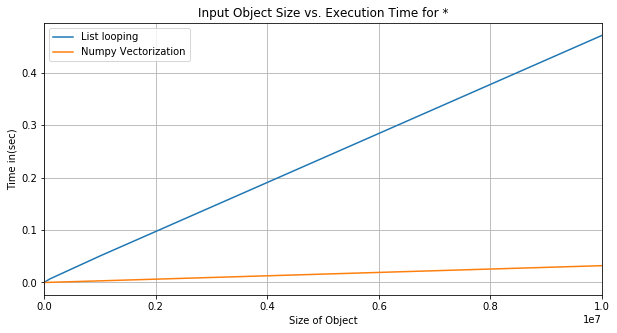

In [39]:
df.plot(x="C",y=["tL","tN"], figsize=(10,5), grid=True)
plt.xlabel("Size of Object")
plt.ylabel("Time in(sec)")
plt.legend(["List looping", "Numpy Vectorization"])
plt.title("Input Object Size vs. Execution Time for *")
plt.show()